In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline
import matplotlib
import requests
from pandas.io.json import json_normalize 
import time 
import csv
import os
from pprint import pprint
import ipywidgets as widgets
from IPython.display import display

import seaborn as sns

C:\Users\shweta shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


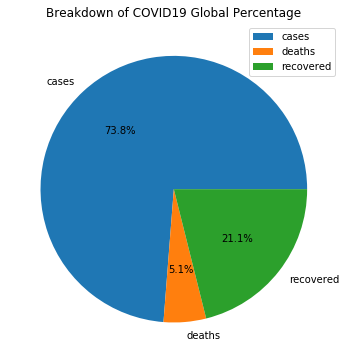

In [2]:
Overall Data of cases, recovered and deaths and give a snapshot view
global_url = "https://coronavirus-19-api.herokuapp.com/all"
response_global_url = requests.get(global_url)
global_df = json_normalize(response_global_url.json(), errors='ignore')
global_df

Global_DF = pd.DataFrame(global_df)
Global_DF

# Filter the DataFrame down only to those columns to chart
pie_chart = Global_DF[["cases","deaths","recovered"]]

# Labels for the sections of our pie chart
labels = ["cases", "deaths", "recovered"]

# The values of each section of the pie chart
sizes = pie_chart

# Creates the pie chart based upon the values above, save and display it
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes,labels = labels, autopct='%1.1f%%')
plt.tight_layout()
plt.title("Breakdown of COVID19 Global Percentage")
plt.legend( loc = 'upper right' )
plt.savefig("PNG Folder/COVID19 Global Percentage of Cases")

In [3]:
#Main Countries Dataframe Creation used for Analysis

# uploading cases/deaths by country and formatting dataframe
countries_url = "https://coronavirus-19-api.herokuapp.com/countries"
response2 = requests.get(countries_url)
Countries_df = json_normalize(response2.json(), errors='ignore')
Countries_df = Countries_df.iloc[Countries_df.index>7,[0,1,2,3,4,5,6,7]] 
Countries_df = Countries_df[Countries_df["country"] != "Total:"]
Countries_df.loc[8,"country"]='United States'
Countries_df
#imported data on SES and created a dataframe
globses = pd.read_csv("CSV Folder/GLOB.csv", encoding = 'latin-1')
globses = globses[globses["year"]==2010]
globses = globses.reset_index(drop = True)

#merged ses data with countries Covid Data
combined_Countries_df_data = pd.merge(Countries_df, globses, how="left", on=["country", "country"])  
combined_Countries_df_data.dropna(inplace =True) 
combined_Countries_df_data.reset_index(inplace = True, drop = True) 

#Clean up column header names
combined_Countries_df_data.rename(columns = {"country":"Country",
                           "cases":"Total Cases",
                           "todayCases":"Cases Today",
                           "deaths": "Deaths",
                           "todayDeaths":"Deaths Today",
                           "recovered":"Total Recovered",
                           "active":"Active Cases",
                           "critical": "Critical",
                           "gdppc": "GDP per Capita",
                           "yrseduc":"Avg Years Education"}, inplace = True)

#read in government type file and inner merge on country
gov_df = pd.read_csv("CSV Folder/Gov_type.csv")
combined_Countries_df_data2 = combined_Countries_df_data.merge(gov_df, how="inner", on="Country") 


2910918


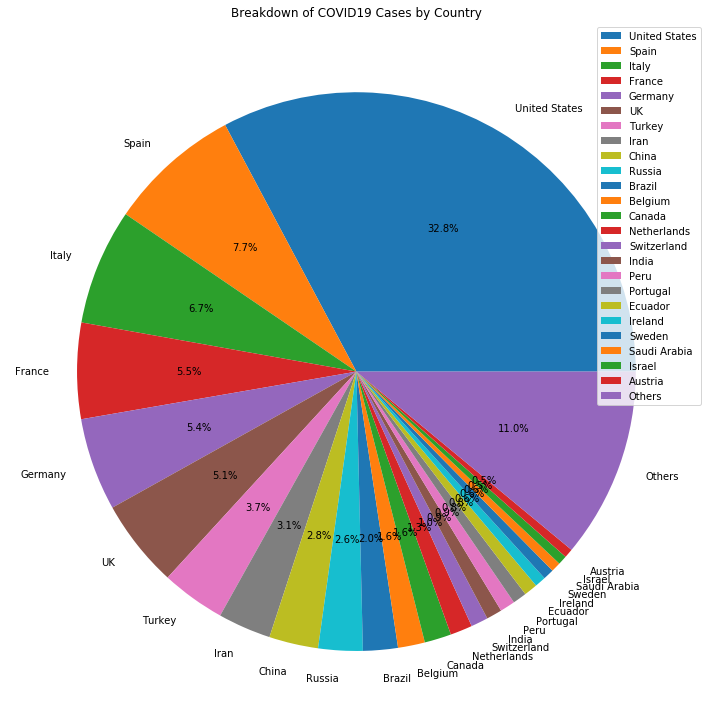

In [4]:
#Created of Pie Chart to see the distribution of cases in the world.  We limiting displaying to countries that contributed
# at least a half of a percent of total cases.

CasesbyCountry = Countries_df.loc[:,["country","cases"]]
CasesbyCountry.sort_values("cases", ascending = False,inplace = True)
CasesbyCountry["Percent of Cases World"]=round(CasesbyCountry["cases"]/(CasesbyCountry["cases"].sum())*100,2)
CasesbyCountry.reset_index(drop = True)
CountryCases =CasesbyCountry ["cases"].sum()
print(CountryCases)
CountryCasesPie = CasesbyCountry[CasesbyCountry["Percent of Cases World"]>.5]
PercentTop = CountryCasesPie["Percent of Cases World"].sum()
PercentOther = (100 - float(PercentTop))
OtherCases = CountryCases - CountryCasesPie["cases"].sum()
Chart = CountryCasesPie.append({"country":"Others","cases":OtherCases,"Percent of Cases World":PercentOther}, ignore_index = True)
labels = Chart["country"]
sizes = Chart ["cases"]
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes,labels = labels, autopct='%1.1f%%')
plt.tight_layout()
plt.title("Breakdown of COVID19 Cases by Country")
plt.legend( loc = 'upper right' )
plt.savefig("PNG Folder/COVID19 Cases by Country.png")


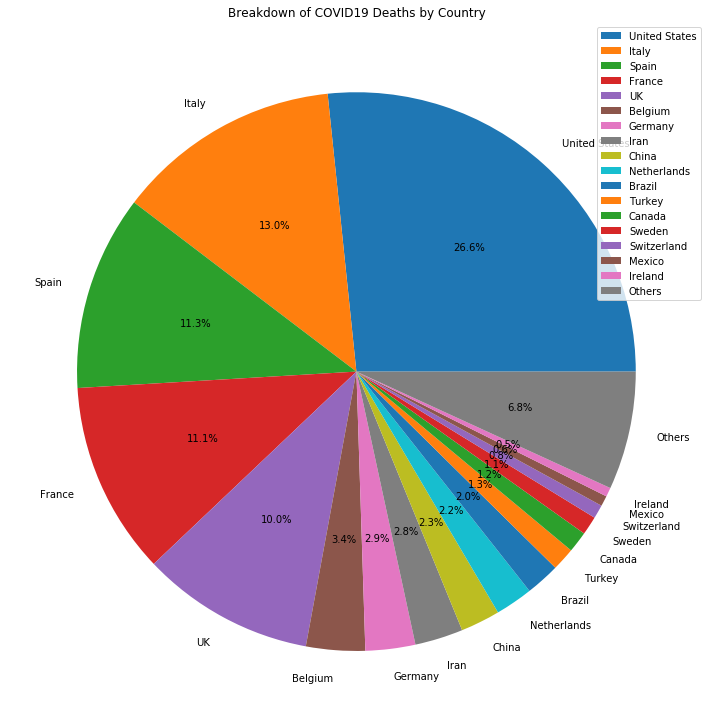

In [5]:
#Created of Pie Chart to see the distribution of deaths in the world.  We limited displaying to countries that contributed
# at least a half of a percent of total cases.

CasesbyCountry = Countries_df.loc[:,["country","deaths"]]
CasesbyCountry.sort_values("deaths", ascending = False,inplace = True)
CasesbyCountry["Percent of Deaths World"]=round(CasesbyCountry["deaths"]/(CasesbyCountry["deaths"].sum())*100,2)
CasesbyCountry.reset_index(drop = True)
CountryCases =CasesbyCountry ["deaths"].sum()
CountryCasesPie = CasesbyCountry[CasesbyCountry["Percent of Deaths World"]>.5]
PercentTop = CountryCasesPie["Percent of Deaths World"].sum()
PercentOther = (100 - float(PercentTop))
OtherCases = CountryCases - CountryCasesPie["deaths"].sum()
Chart = CountryCasesPie.append({"country":"Others","deaths":OtherCases,"Percent of Deaths World":PercentOther}, ignore_index = True)
labels = Chart["country"]
sizes = Chart ["deaths"]
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes,labels = labels, autopct='%1.1f%%')
plt.tight_layout()
plt.title("Breakdown of COVID19 Deaths by Country")
plt.legend( loc = 'upper right' )
plt.savefig("PNG Folder/COVID19 Deaths by Country.png")

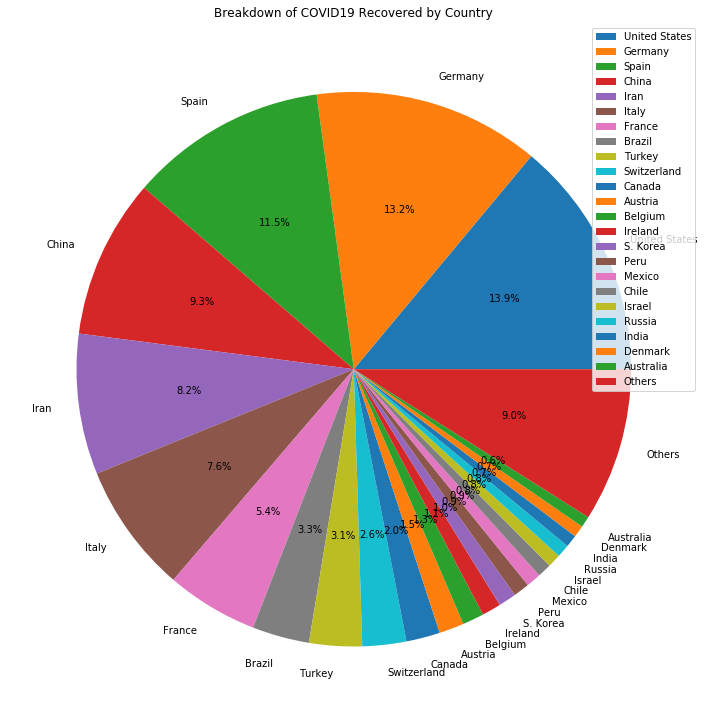

In [6]:
#Created of Pie Chart to see the distribution of recovered people in the world.  We limited displaying to countries that 
#contributed at least a half of a percent of total cases.

CasesbyCountry = Countries_df.loc[:,["country","recovered"]]
CasesbyCountry.sort_values("recovered", ascending = False,inplace = True)
CasesbyCountry["Percent of Recovered World"]=round(CasesbyCountry["recovered"]/(CasesbyCountry["recovered"].sum())*100,2)
CasesbyCountry.reset_index(drop = True)
CountryCases =CasesbyCountry ["recovered"].sum()
CountryCasesPie = CasesbyCountry[CasesbyCountry["Percent of Recovered World"]>.5]
PercentTop = CountryCasesPie["Percent of Recovered World"].sum()
PercentOther = (100 - float(PercentTop))
OtherCases = CountryCases - CountryCasesPie["recovered"].sum()
Chart = CountryCasesPie.append({"country":"Others","recovered":OtherCases,"Percent of Recovered World":PercentOther}, ignore_index = True)
labels = Chart["country"]
sizes = Chart ["recovered"]
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes,labels = labels, autopct='%1.1f%%')
plt.tight_layout()
plt.title("Breakdown of COVID19 Recovered by Country")
plt.legend( loc = 'upper right' )
plt.savefig("PNG Folder/COVID19 Recovered by Country.png")

<function matplotlib.pyplot.show(*args, **kw)>

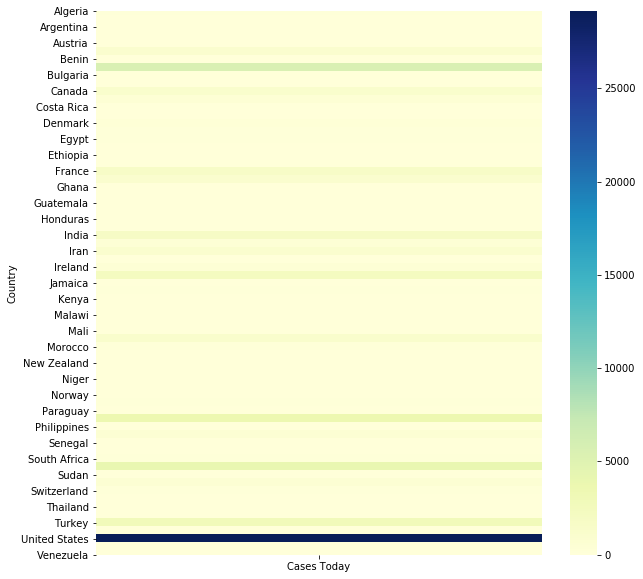

In [7]:
# Filter the DataFrame down only to those columns to chart
heatmap_df = combined_Countries_df_data2[["Country","Cases Today"]]

# pandas pivot
heatmap1_data = pd.pivot_table(heatmap_df, values='Cases Today', 
                     index=['Country'], 
                              )
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap1_data, cmap="YlGnBu")

plt.savefig("PNG Folder/COVID19 Heatmap Cases Today.png")
plt.show

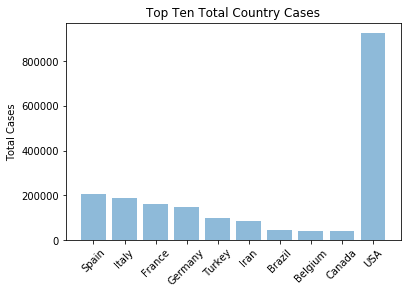

In [8]:
#Limited Dataframe to Top 10 Countries
combined_Countries_df_data2.head(12)
top_10 =combined_Countries_df_data2[combined_Countries_df_data2["Total Cases"]>22000]

#Mat Bar Graph

x_axis = ('Spain','Italy','France','Germany','Turkey','Iran','Brazil','Belgium','Canada','USA')
y_axis = (208389,187327,159877,150062,98674,85996,45757,41889,39813,925038)

plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.xticks( x_axis, rotation = 45)
plt.ylabel('Total Cases')
plt.title('Top Ten Total Country Cases')
plt.show()


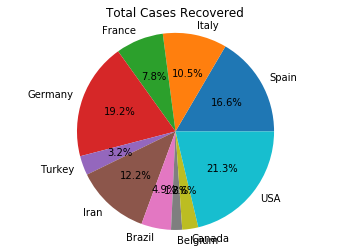

In [9]:
#Pie Graph

labels =('Spain','Italy','France','Germany','Turkey','Iran','Brazil','Belgium','Canada','USA')
cases_recovered = [85915,54543,40657,99400,16477,63113,25318,9433,13647,110432]

plt.pie(cases_recovered,labels=labels,autopct='%1.1f%%')
plt.title('Total Cases Recovered',)
plt.axis('equal', rotation = 45)
plt.show()

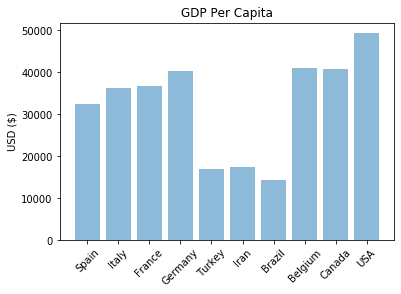

<function matplotlib.pyplot.show(*args, **kw)>

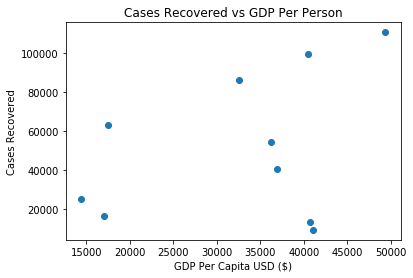

In [10]:
#Plots GDP
x_axis_1 = ['Spain','Italy','France','Germany','Turkey','Iran','Brazil','Belgium','Canada','USA']
y_pos_1 = np.arange(len(x_axis))
y_axis_1 = [32506,36201,36872,40428,17076,17517,14405,41086,40699,49372]

plt.bar(x_axis_1, y_axis_1, align='center', alpha=0.5)
plt.xticks(y_pos_1, x_axis, rotation = 45)
plt.ylabel('USD ($)')
plt.title('GDP Per Capita')
plt.show()

plt.scatter(y_axis_1, cases_recovered)
plt.xlabel("GDP Per Capita USD ($)")
plt.ylabel("Cases Recovered")
plt.title('Cases Recovered vs GDP Per Person')
plt.show